# Study of Indian Premier League data

### In this project, I examine the Indian Premier League Dataset, a yearly cricket competition in India that attracts players from all over the globe. Here, we are analyzing the data to get insights of various features. 
We requires the understanding of 6 pillars
 - Business Understanding
 - Data Understanding
 - Data Preparation/ Wrangling
 - Data Modeling
 - Data Evaluation
 - Deployment

## INteresting questions to ask
 - Question1. Venue-Wise - What decision does teams generally take after winning the toss

 - Question 2Matches hosted in each city

 - Question3 Most Dismissals by a WicketKeeper

 - Question4 How many times each teams have won the toss ?

 - Question5 Decision upon winning the toss by teams.

 - Question6 % of matches won batting first/fielding first

## 1. Understanding Dataset

### I'll attempt to comprehend each dataset and give you a sense of the various columns in this part.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_allmatches = pd.read_csv('allmatches.csv')
df_delivery = pd.read_csv('delivery.csv')

In [3]:
df_allmatches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
df_delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
df_allmatches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

# Insights from Data
 - There are 756 rows and 18 columns.

 - There are null values in columns: (city,winner,player_of_match,umpire1,umpire2,umpire3).

 - There are 5 numerical columns and rest are categorical columns

In [6]:
df_delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

# Insights from Data
 - There are 21 columns and 179078 rows.

 - (Player dismissed, Dismissal kind, Fielder) have null entries.

 - There are 8 categorical columns and the remaining sections are numerical.

# Different numbers and values for toss decisions

field    463
bat      293
Name: toss_decision, dtype: int64


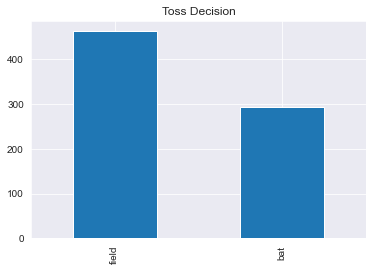

In [7]:
print(df_allmatches.toss_decision.value_counts())
df_allmatches.toss_decision.value_counts().plot.bar(title='Toss Decision');

# Various locations where matches are conducted

In [8]:
temperory = df_allmatches[['city','venue']]
temperory = temperory.drop_duplicates().reset_index()

In [9]:
temperory.drop(columns=['index'],inplace=True)
temperory

,city,venue
0,Hyderabad,"Rajiv Gandhi International Stadium, Uppal"
1,Pune,Maharashtra Cricket Association Stadium
2,Rajkot,Saurashtra Cricket Association Stadium
3,Indore,Holkar Cricket Stadium
4,Bangalore,M Chinnaswamy Stadium
5,Mumbai,Wankhede Stadium
6,Kolkata,Eden Gardens
7,Delhi,Feroz Shah Kotla
8,Chandigarh,"Punjab Cricket Association IS Bindra Stadium, ..."
9,Kanpur,Green Park


# Evaluation: 
 - Due to the same stadium having various names, the same venue appears twice. Hence we have to make everything uniform.

# 2. Data Preparation/Wrangling

## Venue-based toss decision: examining the presence of any empty values

In [10]:
np.sum(df_allmatches[['toss_decision','venue']].isna())

toss_decision    0
venue            0
dtype: int64

## The city column has null values; it will be fixed depending on the venue column.

In [12]:
df_allmatches[df_allmatches.city.isna()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


## As seen above, every city that was absent was for the stadium in Dubai.

### Cleaning the city column

In [13]:
df_allmatches.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

### Observation: Bengaluru is another name for Bangalore.

In [14]:
df_allmatches.loc[df_allmatches['city'] == 'Bengaluru', 'city'] = 'Bangalore'

In [15]:
cities = list(df_allmatches.city.unique())
cities

['Hyderabad',
 'Pune',
 'Rajkot',
 'Indore',
 'Bangalore',
 'Mumbai',
 'Kolkata',
 'Delhi',
 'Chandigarh',
 'Kanpur',
 'Jaipur',
 'Chennai',
 'Cape Town',
 'Port Elizabeth',
 'Durban',
 'Centurion',
 'East London',
 'Johannesburg',
 'Kimberley',
 'Bloemfontein',
 'Ahmedabad',
 'Cuttack',
 'Nagpur',
 'Dharamsala',
 'Kochi',
 'Visakhapatnam',
 'Raipur',
 'Ranchi',
 'Abu Dhabi',
 'Sharjah',
 nan,
 'Mohali']

## cleaning the venues column

In [16]:
temperory = df_allmatches[['city','venue']]
temperory = temperory.drop_duplicates().reset_index()
temperory.drop(columns=['index'],inplace=True)
temperory

,city,venue
0,Hyderabad,"Rajiv Gandhi International Stadium, Uppal"
1,Pune,Maharashtra Cricket Association Stadium
2,Rajkot,Saurashtra Cricket Association Stadium
3,Indore,Holkar Cricket Stadium
4,Bangalore,M Chinnaswamy Stadium
5,Mumbai,Wankhede Stadium
6,Kolkata,Eden Gardens
7,Delhi,Feroz Shah Kotla
8,Chandigarh,"Punjab Cricket Association IS Bindra Stadium, ..."
9,Kanpur,Green Park


In [17]:
temperory.city.value_counts()

Mumbai            3
Chandigarh        2
Visakhapatnam     2
Mohali            2
Pune              2
Delhi             2
Chennai           2
Hyderabad         2
Bangalore         2
Kanpur            1
Bloemfontein      1
Johannesburg      1
Nagpur            1
Ranchi            1
Dharamsala        1
Cuttack           1
Sharjah           1
Kimberley         1
Durban            1
Centurion         1
Jaipur            1
Rajkot            1
East London       1
Kolkata           1
Kochi             1
Cape Town         1
Raipur            1
Ahmedabad         1
Abu Dhabi         1
Indore            1
Port Elizabeth    1
Name: city, dtype: int64

## Observations: 
 - Chandigarh & Mohali's "Punjab Cricket Association IS Bindra Stadium, Mohali" and "Punjab Cricket Association Stadium, Mohali" are duplicates.

 - Hyderabad: "Rajiv Gandhi International Stadium, Uppal" and "Rajiv Gandhi Intl. Cricket Stadium"

 - Feroz Shah Kotla and Feroz Shah Kotla Stadium are both in Delhi.

 - M. A. Chidambaram Stadium and MA Chidambaram Stadium, Chepauk are both in Chennai.

 - "ACA-VDCA Stadium" and "Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium" are both in Vizag.

In [18]:
df_allmatches.loc[df_allmatches['city'] == 'Mohali', 'venue'] = 'Punjab Cricket Association IS Bindra Stadium, Mohali'
df_allmatches.loc[df_allmatches['city'] == 'Hyderabad', 'venue'] = 'Rajiv Gandhi International Stadium, Uppal'
df_allmatches.loc[df_allmatches['city'] == 'Delhi', 'venue'] = 'Feroz Shah Kotla Ground'
df_allmatches.loc[df_allmatches['city'] == 'Chennai', 'venue'] = 'MA Chidambaram Stadium, Chepauk'
df_allmatches.loc[df_allmatches['city'] == 'Visakhapatnam', 'venue'] = 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
df_allmatches.loc[df_allmatches['city'] == 'Pune', 'venue'] = 'Maharashtra Cricket Association Stadium'
df_allmatches.loc[df_allmatches['city'] == 'Bangalore', 'venue'] = 'M. Chinnaswamy Stadium'

In [19]:
temperory = df_allmatches[['city','venue']]
temperory = temperory.drop_duplicates().reset_index()
temperory.drop(columns=['index'],inplace=True)
temperory.city.value_counts()

Mumbai            3
Chandigarh        2
Johannesburg      1
Delhi             1
Mohali            1
Sharjah           1
Cuttack           1
Dharamsala        1
Kimberley         1
Bangalore         1
Nagpur            1
Kanpur            1
Bloemfontein      1
Ranchi            1
Centurion         1
Durban            1
Chennai           1
Hyderabad         1
Jaipur            1
Rajkot            1
East London       1
Kolkata           1
Kochi             1
Cape Town         1
Raipur            1
Ahmedabad         1
Abu Dhabi         1
Pune              1
Indore            1
Visakhapatnam     1
Port Elizabeth    1
Name: city, dtype: int64

## Cleaning the team names

In [20]:
df_allmatches.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [21]:
df_allmatches.loc[df_allmatches['team1'] == 'Rising Pune Supergiant', 'team1'] = 'Rising Pune Supergiants'
df_allmatches.loc[df_allmatches['team2'] == 'Rising Pune Supergiant', 'team2'] = 'Rising Pune Supergiants'
df_allmatches.loc[df_allmatches['toss_winner'] == 'Rising Pune Supergiant', 'toss_winner'] = 'Rising Pune Supergiants'
df_allmatches.loc[df_allmatches['winner'] == 'Rising Pune Supergiant', 'winner'] = 'Rising Pune Supergiants'

# 3. Analysis and Model creation

### Question 1) Toss decision based on the match's location

In [22]:
df_tossresult = df_allmatches[['city','toss_decision','toss_winner','winner']]

In [23]:
df_tossresult.count()

city             749
toss_decision    756
toss_winner      756
winner           752
dtype: int64

## Removing Rows where there is no result or winners for matches

In [24]:
df_tossresult = df_tossresult.dropna(subset=['winner'],axis=0)

In [25]:
# SIDE WINNING THE MATCH DID (BATTING/FIELDING) FIRST

def decision(row):
    
    '''
    Input: Enter each entry of the dataframe.
    
    Output: bat/field (i.e. Team winning the contest did first) 
    '''
    if row['toss_winner'] == row['winner']:
        val = row['toss_decision']
    else:
        if row['toss_decision'] == 'bat':
            val = 'field'
        else:
            val = 'bat'
    return val
# Apply the above function to the toss DataFrame
df_tossresult['winning_decision'] = df_tossresult.apply(decision, axis=1)
# Get first 5 rows
df_tossresult.head()

,city,toss_decision,toss_winner,winner,winning_decision
0,Hyderabad,field,Royal Challengers Bangalore,Sunrisers Hyderabad,bat
1,Pune,field,Rising Pune Supergiants,Rising Pune Supergiants,field
2,Rajkot,field,Kolkata Knight Riders,Kolkata Knight Riders,field
3,Indore,field,Kings XI Punjab,Kings XI Punjab,field
4,Bangalore,bat,Royal Challengers Bangalore,Royal Challengers Bangalore,bat


In [26]:
## To win the game, only the location and toss will be considered now.
df_tossresult = df_tossresult[['city','winning_decision']]
df_tossresult.head()

,city,winning_decision
0,Hyderabad,bat
1,Pune,field
2,Rajkot,field
3,Indore,field
4,Bangalore,bat


In [27]:
## ## To transform categorical variables and concatenate with the original df, we must now use one hot encoder.
df_tossresult = pd.concat([df_tossresult.drop(['winning_decision'],axis=1),pd.get_dummies(df_tossresult.winning_decision,prefix='winning_decision',prefix_sep='_')],axis=1)
df_tossresult.head()

,city,winning_decision_bat,winning_decision_field
0,Hyderabad,1,0
1,Pune,0,1
2,Rajkot,0,1
3,Indore,0,1
4,Bangalore,1,0


In [28]:
# Get the total of all the other columns after grouping by city.
df_tossresult = df_tossresult.groupby('city').sum().reset_index()
##Get the total number of matches completed.
df_tossresult['total'] = df_tossresult.winning_decision_bat+df_tossresult.winning_decision_field
# Determine the proportion of batting decisions.
df_tossresult['bat_decision_win'] = round(((df_tossresult.winning_decision_bat)/df_tossresult.total)*100,2)
# Calculate feilding decision percentage
df_tossresult['field_decision_win'] = round(((df_tossresult.winning_decision_field)/df_tossresult.total)*100,2)
# Get first 5 rows
df_tossresult.head()

,city,winning_decision_bat,winning_decision_field,total,bat_decision_win,field_decision_win
0,Abu Dhabi,4,3,7,57.14,42.86
1,Ahmedabad,6,6,12,50.00,50.00
2,Bangalore,33,44,77,42.86,57.14
3,Bloemfontein,1,1,2,50.00,50.00
4,Cape Town,5,2,7,71.43,28.57


In [29]:
## Taking Out Extra Sections
df_tossresult = df_tossresult.drop(columns=['winning_decision_bat','winning_decision_field','total'],axis=1)
df_tossresult

,city,bat_decision_win,field_decision_win
0,Abu Dhabi,57.14,42.86
1,Ahmedabad,50.00,50.00
2,Bangalore,42.86,57.14
3,Bloemfontein,50.00,50.00
4,Cape Town,71.43,28.57
5,Centurion,33.33,66.67
6,Chandigarh,43.48,56.52
7,Chennai,61.40,38.60
8,Cuttack,57.14,42.86
9,Delhi,46.58,53.42


## Insight from above data

 - For instance, there is a 61% probability that you will win the match if Kolkata is the host city and you bat first. Once more, we can only make this assertion based on the historical evidence.

## Question 2.Games played in every location

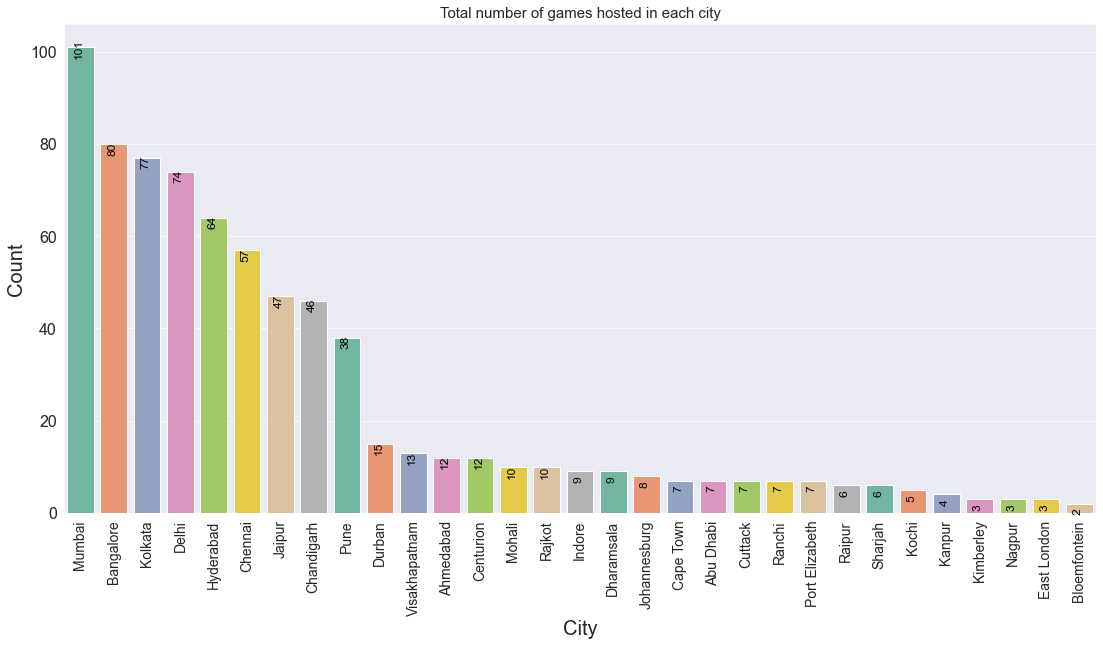

In [32]:
figure=plt.gcf()
figure.set_size_inches(18.5,9)
sns.countplot(df_allmatches['city'],order=df_allmatches['city'].value_counts().index,palette='Set2')
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=16)
plt.xlabel('City',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('Total number of games hosted in each city',fontsize=15)
count=0
cities=pd.DataFrame(df_allmatches['city'].value_counts())
cities['name']=df_allmatches['city'].value_counts().index
for i in cities['city']:
    plt.text(count-0.2,i-2,str(i),rotation=90,color='black',size=12)
    count+=1
plt.show()

## Insight
 - Given that Mumbai has three stadiums, we can see that the majority of events take place there. The following highest amount of games are played at Eden Garden in Kolkata.

## Question 3: Wicketkeeper with the most dismissals

In [33]:
## Aplethora types of dismissals
df_delivery['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [34]:
## Completing the identities of the wicketkeepers and the number of stumpings.
wicket_keeper_stumping = df_delivery[df_delivery['dismissal_kind']=='stumped']['fielder'].value_counts().reset_index()
# Renaming the column 
wicket_keeper_stumping.rename(columns={'index':'wicket_keeper','fielder':'stumping'}, inplace=True)
# Get first 5 rows
wicket_keeper_stumping.head()

,wicket_keeper,stumping
0,MS Dhoni,38
1,RV Uthappa,32
2,KD Karthik,29
3,WP Saha,18
4,AC Gilchrist,16


In [35]:
# Obtaining the identities of each wicketkeeper.
wicket_keeper_list = wicket_keeper_stumping.wicket_keeper.tolist()

# Take the dismissal kind as caught and defender should be present in the wicket keeper list
wicket_keeper_catches = df_delivery[(df_delivery['dismissal_kind']=='caught') & (df_delivery['fielder'].isin(wicket_keeper_list))]['fielder'].value_counts().reset_index()
# Rename the columns 
wicket_keeper_catches.rename(columns={'index':'wicket_keeper','fielder':'catches'}, inplace=True)
# Get first 5 rows
wicket_keeper_catches.head()

,wicket_keeper,catches
0,KD Karthik,109
1,MS Dhoni,98
2,AB de Villiers,93
3,RV Uthappa,84
4,PA Patel,69


In [36]:
# Using Left Outer Join on wicket_keeper_stumping and wicket_keeper_catches
wicket_keeper_dismissals = pd.merge(wicket_keeper_stumping,wicket_keeper_catches,on='wicket_keeper',how='outer')
# Insert NaN values to 0
wicket_keeper_dismissals.catches = wicket_keeper_dismissals.catches.fillna(0)
# Convert the data-type of catches to integer (from float)
wicket_keeper_dismissals.catches = wicket_keeper_dismissals.catches.astype(int)
# Get the total number by adding number of stumping and catches
wicket_keeper_dismissals['total'] = wicket_keeper_dismissals.stumping + wicket_keeper_dismissals.catches
# Sort the DataFrame by the total number
wicket_keeper_dismissals = wicket_keeper_dismissals.sort_values(['total'], ascending=False).reset_index()
# Drop the index column
wicket_keeper_dismissals.drop('index', axis=1, inplace=True)
# Get first 5 rows
wicket_keeper_dismissals.head()

,wicket_keeper,stumping,catches,total
0,KD Karthik,29,109,138
1,MS Dhoni,38,98,136
2,RV Uthappa,32,84,116
3,AB de Villiers,7,93,100
4,PA Patel,16,69,85


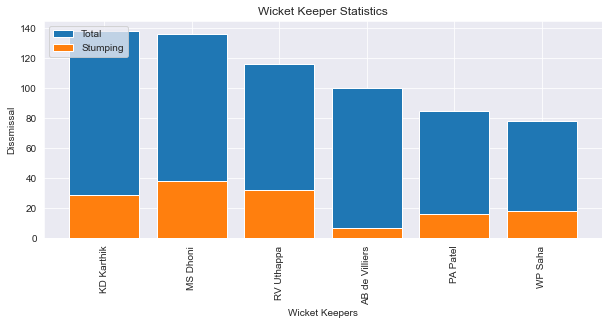

In [38]:
wicket_keeper_dismissals_top6 = wicket_keeper_dismissals.head(6)
plt.figure(figsize=(10,4))
plt.bar(wicket_keeper_dismissals_top6['wicket_keeper'],wicket_keeper_dismissals_top6['total'], label='Total')
plt.bar(wicket_keeper_dismissals_top6['wicket_keeper'],wicket_keeper_dismissals_top6['stumping'], label='Stumping')
plt.xticks(rotation=90)
plt.title('Wicket Keeper Statistics')
plt.xlabel('Wicket Keepers')
plt.ylabel('Dissmissal')
plt.legend(loc='upper left')
plt.show()

## Insight:
 - As we can see, MS Dhoni made the most stumpings compared to KD Karthik who made the most dismissals.

# Question4.How many times did each squad win the coin toss?

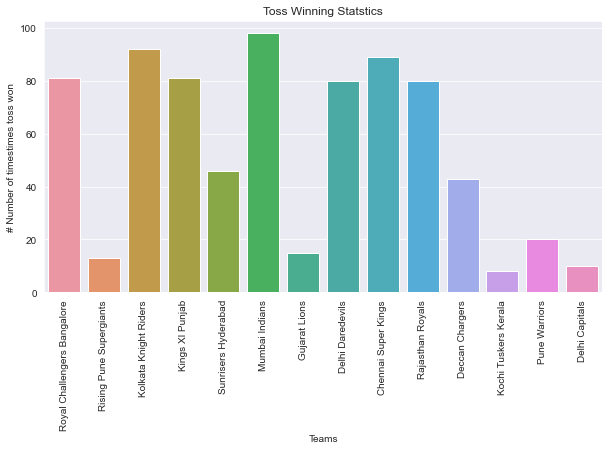

In [40]:
plt.figure(figsize=(10,5))
sns.countplot( x = 'toss_winner', data = df_allmatches)
plt.xticks(rotation='vertical')
plt.title('Toss Winning Statstics')
plt.xlabel('Teams')
plt.ylabel('# Number of timestimes toss won')
plt.show()

## Insight
 - Mumbai Indians have won the draw the most times in the IPL, as shown by the graph.

## Question 5.Desicision taken by teams after winning the toss

In [41]:
teams_decision = df_allmatches[['id','toss_winner','toss_decision']]
teams_decision.head()

,id,toss_winner,toss_decision
0,1,Royal Challengers Bangalore,field
1,2,Rising Pune Supergiants,field
2,3,Kolkata Knight Riders,field
3,4,Kings XI Punjab,field
4,5,Royal Challengers Bangalore,bat


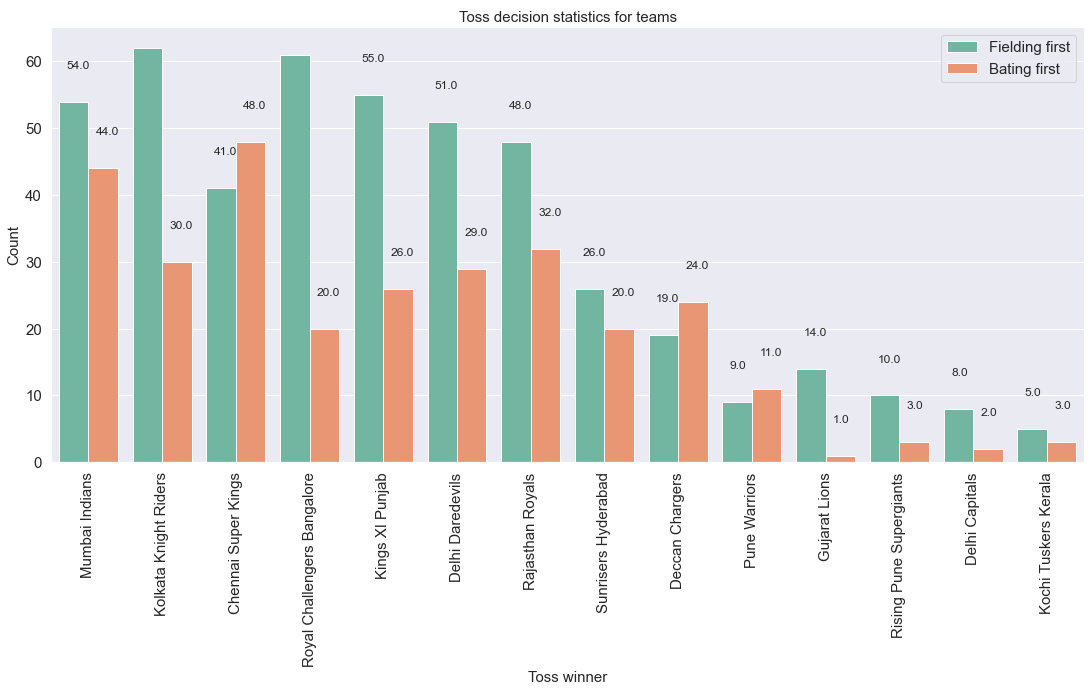

In [43]:
x = np.arange(len(teams_decision['toss_winner'].value_counts().index))
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(18.5,8)
ax = sns.countplot(teams_decision['toss_winner'],order=teams_decision['toss_winner'].value_counts().index,palette='Set2',hue=teams_decision['toss_decision'])
plt.title('Toss decision statistics for teams',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15,rotation=90)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(['Fielding first','Bating first'],loc='best',fontsize=15)
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

plt.show()

## Insight
 - The graph and table above show that after winning the toss, teams frequently choose to play first.

## Question 6. Victory percentage for various teams, batting first and fielding first

In [44]:
temperory = df_allmatches[['team1','team2','toss_winner','toss_decision','winner']]
temperory = temperory.dropna(axis=0)
temperory.head()

,team1,team2,toss_winner,toss_decision,winner
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad
1,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,Rising Pune Supergiants
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders
3,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab
4,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,Royal Challengers Bangalore


In [45]:
# Was the winning squad at the game also the toss winner?
def decision(row):
    
    '''
    Input: Every row in the dataframe
    
    Output: bat/field (i.e. Team winning the match did first)
    '''
    if row['toss_winner'] == row['winner']:
        val = row['toss_decision']
    else:
        if row['toss_decision'] == 'bat':
            val = 'field'
        else:
            val = 'bat'
    return val
# Apply the above function to the toss DataFrame
temperory['winningteam_1st_innings'] = temperory.apply(decision, axis=1)
# Get first 5 rows
temperory.head()

,team1,team2,toss_winner,toss_decision,winner,winningteam_1st_innings
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,bat
1,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,Rising Pune Supergiants,field
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,field
3,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,field
4,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,Royal Challengers Bangalore,bat


In [47]:
temperory1 = temperory[['winner','winningteam_1st_innings']]
## To transform categorical variables and concatenate with the original DF, we must now use a single hot encoder.
temperory1 = pd.concat([temperory1.drop(['winningteam_1st_innings'],axis=1),pd.get_dummies(temperory1.winningteam_1st_innings,prefix='1st_innings',prefix_sep='_')],axis=1)
temperory1.head()

,winner,1st_innings_bat,1st_innings_field
0,Sunrisers Hyderabad,1,0
1,Rising Pune Supergiants,0,1
2,Kolkata Knight Riders,0,1
3,Kings XI Punjab,0,1
4,Royal Challengers Bangalore,1,0


In [48]:
# Get the sum of all the other columns after grouping by location.
temperory1 = temperory1.groupby('winner').sum().reset_index()
# Get the total number of matches played
temperory1['total'] = temperory1['1st_innings_bat']+temperory1['1st_innings_field']
# Calculate batting decision percentage
temperory1['bat_first_win'] = round(((temperory1['1st_innings_bat'])/temperory1.total)*100,2)
# Calculate feilding decision percentage
temperory1['field_first_win'] = round(((temperory1['1st_innings_field'])/temperory1.total)*100,2)
## Removing Unnecessary Columns
temperory1 = temperory1.drop(columns=['1st_innings_bat','1st_innings_field','total'],axis=1)
temperory1

,winner,bat_first_win,field_first_win
0,Chennai Super Kings,51.00,49.00
1,Deccan Chargers,62.07,37.93
2,Delhi Capitals,30.00,70.00
3,Delhi Daredevils,37.31,62.69
4,Gujarat Lions,7.69,92.31
5,Kings XI Punjab,46.34,53.66
6,Kochi Tuskers Kerala,33.33,66.67
7,Kolkata Knight Riders,36.96,63.04
8,Mumbai Indians,53.21,46.79
9,Pune Warriors,50.00,50.00


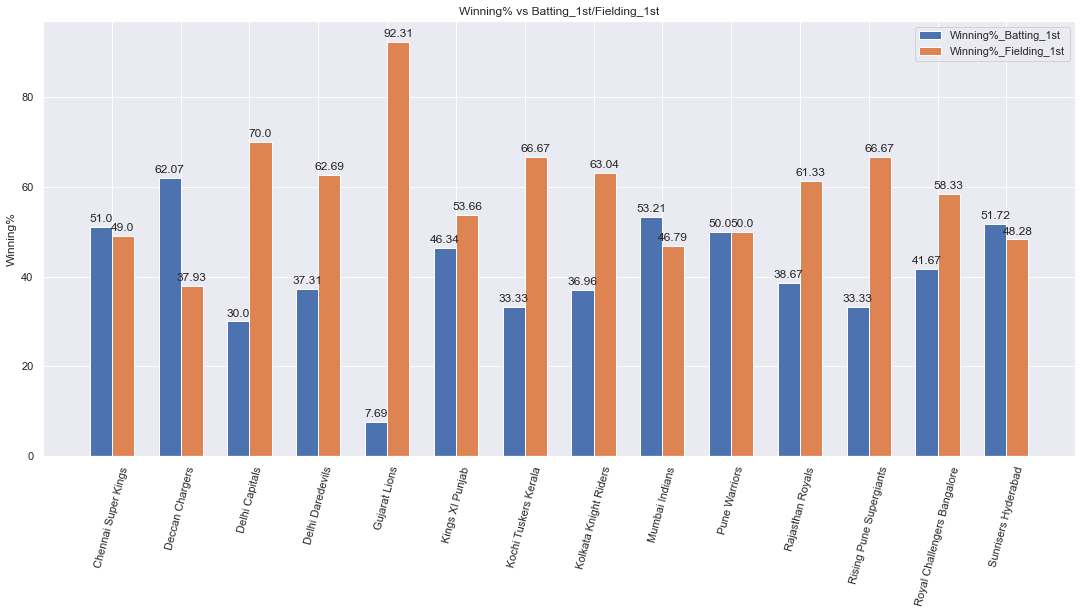

In [50]:
x = np.arange(len(temperory1['winner']))  # the label locations
width = 0.32  # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(18.5,8)
rects1 = ax.bar(x - width/2, temperory1['bat_first_win'], width, label='Winning%_Batting_1st')
rects2 = ax.bar(x + width/2, temperory1['field_first_win'], width, label='Winning%_Fielding_1st')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Winning%')
ax.set_title('Winning% vs Batting_1st/Fielding_1st')
ax.set_xticks(x)
ax.set_xticklabels(temperory1['winner'])
ax.legend()
plt.xticks(rotation=75)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

# fig.tight_layout()

plt.show()

# 4. Predicting and evaluate the Model 

In [51]:
df_allmatches = df_allmatches.dropna(subset=['winner'],axis=0)

In [52]:
allmatches = df_allmatches[['city','team1','team2','toss_winner','toss_decision','winner','venue']]
allmatches.head(4)

,city,team1,team2,toss_winner,toss_decision,winner,venue
0,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,"Rajiv Gandhi International Stadium, Uppal"
1,Pune,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,Rising Pune Supergiants,Maharashtra Cricket Association Stadium
2,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,Saurashtra Cricket Association Stadium
3,Indore,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,Holkar Cricket Stadium


In [53]:
from sklearn.preprocessing import LabelEncoder
#encodering
encodering= LabelEncoder()
allmatches["team1"]=encodering.fit_transform(allmatches["team1"])
allmatches["team2"]=encodering.fit_transform(allmatches["team2"])
allmatches["winner"]=encodering.fit_transform(allmatches["winner"].astype(str))
allmatches["toss_winner"]=encodering.fit_transform(allmatches["toss_winner"])
allmatches["venue"]=encodering.fit_transform(allmatches["venue"])

In [65]:
## Resulted variable as probability of team 1 winning
allmatches.loc[allmatches["winner"]==allmatches["team1"],"team1_win"]=1
allmatches.loc[allmatches["winner"]!=allmatches["team1"],"team1_win"]=0

allmatches.loc[allmatches["toss_winner"]==allmatches["team1"],"team1_toss_win"]=1
allmatches.loc[allmatches["toss_winner"]!=allmatches["team1"],"team1_toss_win"]=0

allmatches["team1_bat"]=0
allmatches.loc[((allmatches["team1_toss_win"]==1) & (allmatches["toss_decision"]=="bat")) | ((allmatches["team1_toss_win"]==0) & (allmatches["toss_decision"]=="field"))]

,city,team1,team2,toss_winner,toss_decision,winner,venue,team1_win,team1_toss_win,team1_bat
0,Hyderabad,13,12,12,field,13,23,1.0,0.0,0
1,Pune,8,11,11,field,11,16,0.0,0.0,0
2,Rajkot,4,7,7,field,7,25,0.0,0.0,0
3,Indore,11,5,5,field,5,11,0.0,0.0,0
4,Bangalore,12,3,12,bat,12,14,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...
751,Mumbai,7,8,8,field,8,33,0.0,0.0,0
752,Chennai,0,8,0,bat,8,15,0.0,1.0,0
753,Visakhapatnam,13,2,2,field,2,5,0.0,0.0,0
754,Visakhapatnam,2,0,0,field,0,5,0.0,0.0,0


In [66]:
predicted_df=allmatches[["team1","team2","team1_toss_win","team1_bat","team1_win","venue"]]

#dropping maximum correlated features
correlated_features = set()
correlation_matrix = predicted_df.drop('team1_win', axis=1).corr()
correlation_matrix

,team1,team2,team1_toss_win,team1_bat,venue
team1,1.000000,-0.108116,-0.116832,NaN,0.106495
team2,-0.108116,1.000000,-0.008782,NaN,0.083034
team1_toss_win,-0.116832,-0.008782,1.000000,NaN,0.002288
team1_bat,NaN,NaN,NaN,NaN,NaN
venue,0.106495,0.083034,0.002288,NaN,1.000000


In [67]:
predicted_df.drop(columns='team1_bat',inplace=True)

In [69]:
# selecting features
X = predicted_df.drop('team1_win', axis=1)
target = predicted_df['team1_win']
target=target.astype(int)

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#Split the data into training and testing data and enhancing it
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [71]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
# print(confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y_pred))
print('Accuracy of logistic regression model on test set: {:.4f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression model on test set: 0.6150


In [72]:
from sklearn.svm import SVC
#SVM
svm=SVC()
svm.fit(X_train,y_train)
svm.score(X_test,y_test)
y_pred = svm.predict(X_test)
# print(confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y_pred))
print('Accuracy of SVM model on test set: {:.4f}'.format(svm.score(X_test, y_test)))

Accuracy of SVM model on test set: 0.6327


In [73]:
from sklearn.tree import DecisionTreeClassifier
#Decision Tree Classifier model
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree.score(X_test,y_test)
y_pred = dtree.predict(X_test)
# print(confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y_pred))
print('Accuracy of decision tree classifier model on test set: {:.4f}'.format(dtree.score(X_test, y_test)))

Accuracy of decision tree classifier model on test set: 0.5752


In [74]:
from sklearn.ensemble import RandomForestClassifier
#Random Forest Classifier model
randomForest= RandomForestClassifier(n_estimators=100)
randomForest.fit(X_train,y_train)
randomForest.score(X_test,y_test)
y_pred = randomForest.predict(X_test)
# print("Confusion matrix\n",confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y_pred))
print('Accuracy of random forest classifier model on test set: {:.4f}'.format(randomForest.score(X_test, y_test)))

Accuracy of random forest classifier model on test set: 0.5044


# Toss Call based on Venue of the Match.

 - Question1. Venue-Wise - What decision does teams generally take after winning the toss

 - Question 2Matches hosted in each city

 - Question3 Most Dismissals by a WicketKeeper

 - Question4 How many times each teams have won the toss ?

 - Question5 Decision upon winning the toss by teams.

 - Question6 % of matches won batting first/fielding first

# Conclusion/Evaluation
I intended to analyze the statistics from the Indian Premier League, a well-known cricket competition in India, in this notebook. To address the following queries, I used descriptive statistics and various ML modeling methods (Logistic Regression, SVM, DecisionTrees, RandomForest):

 - 1.What is the likelihood of winning the game at a specific location if you choose to field or play first after winning the toss?<br>
 I first combined all the various locations where the games were played, cleaned the data, and then used statistics to determine, venue by venue, what the win rate was when choosing to field or bat first after winning the toss.<b>For instance, there is a 61% probability that we will win the match if Kolkata is the host city and we bat first.
 

 - 2.Most dismissals by a wicketkeeper?<br>
I used this query to decide which wicketkeeper to purchase in the following sale based on performance. I aggregated the stumpings and catches by wicketkeepers using the ball by ball deliveries information after first identifying all of them by name.<b>We found that Karthik and Dhoni were amongst the most successful wicketkeeper in IPL History.

 - 3.Finally, we experimented with various ML models to forecast the victorious squad using features:
 - Team 1 Name
 - Team 2 Name
 - Venue
 - Toss Winner<br>
<b>To make categorical factors understandable to models, we used Label Encoding and presented the problem as a binary classification task: will Team 1 win or lose?